# **Clustering Model**  
Muhammad Fahmi Hussain

---

# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
Dataset diperoleh dari public repositories *Kaggle* https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering
2. **Jumlah Data**:  
Dataset ini memiliki 29 fitur dan 2240 catatan.  
3. **Fitur:**  
* Id:Pengidentifikasi unik untuk setiap individu dalam dataset.  
* Year_Birth: Tahun lahir individu.  
* Education: Tingkat pendidikan tertinggi yang dicapai oleh individu.  
* Marital_Status: Status pernikahan individu.  
* Income: Pendapatan tahunan individu.  
* Kidhome: Jumlah anak kecil di rumah tangga.  
* Teenhome: Jumlah remaja di rumah tangga.  
* Dt_Customer: Tanggal ketika pelanggan pertama kali terdaftar atau menjadi bagian dari basis data perusahaan.  
* Recency: Jumlah hari sejak pembelian atau interaksi terakhir.  
* MntWines: Jumlah yang dibelanjakan untuk anggur.  
* MntFruits: Jumlah yang dibelanjakan untuk buah.  
* MntMeatProducts: Jumlah yang dibelanjakan untuk produk daging.  
* MntFishProducts: Jumlah yang dibelanjakan untuk produk ikan.  
* MntSweetProducts: Jumlah yang dibelanjakan untuk produk manis.  
* MntGoldProds: Jumlah yang dibelanjakan untuk produk emas.  
* NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon atau sebagai bagian dari tawaran.  
* NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan.  
* NumCatalogPurchases: Jumlah pembelian yang dilakukan melalui katalog.  
* NumStorePurchases: Jumlah pembelian yang dilakukan di toko fisik.  
* NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan.  
* AcceptedCmp3: Indikator biner (1 atau 0) apakah individu menerima kampanye pemasaran ketiga.  
* AcceptedCmp4: Indikator biner (1 atau 0) apakah individu menerima kampanye pemasaran keempat.  
* AcceptedCmp5: Indikator biner (1 atau 0) apakah individu menerima kampanye pemasaran kelima.  
* AcceptedCmp1: Indikator biner (1 atau 0) apakah individu menerima kampanye pemasaran pertama.  
* AcceptedCmp2: Indikator biner (1 atau 0) apakah individu menerima kampanye pemasaran kedua.  
* Complain: Indikator biner (1 atau 0) apakah individu telah mengajukan keluhan.  
* Z_CostContact: Biaya tetap yang terkait dengan menghubungi pelanggan.  
* Z_Revenue: Pendapatan tetap yang terkait dengan respons kampanye yang sukses.  
* Response: Indikator biner (1 atau 0) apakah individu merespons kampanye pemasaran.


# **2. Import Library**

In [ ]:
#Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

In [ ]:
# Gantilah ID file dengan ID dari Google Drive URL
file_id = '14ZyCRnc_fwgst_LIcvEIIBU9I8B3zGvk'

# Buat URL unduhan langsung
download_url = f'https://drive.google.com/uc?id={file_id}'

# Baca file CSV dari URL
data = pd.read_csv(download_url)

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **4. Exploratory Data Analysis (EDA)**



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Hapus kolom yang tidak diperlukan
data = data.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
# Memisahkan data numerik dan kategorikal
numerical_data = data.select_dtypes(include=['number'])  # Memilih kolom numerik
categorical_data = data.select_dtypes(include=['object', 'category'])  # Memilih kolom kategorikal

# Menampilkan hasil
print("Data Numerik:")
print(numerical_data)

print("\nData Kategorikal:")
print(categorical_data)

Data Numerik:
      Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0           1957  58138.0        0         0       58       635         88   
1           1954  46344.0        1         1       38        11          1   
2           1965  71613.0        0         0       26       426         49   
3           1984  26646.0        1         0       26        11          4   
4           1981  58293.0        1         0       94       173         43   
...          ...      ...      ...       ...      ...       ...        ...   
2235        1967  61223.0        0         1       46       709         43   
2236        1946  64014.0        2         1       56       406          0   
2237        1981  56981.0        0         0       91       908         48   
2238        1956  69245.0        0         1        8       428         30   
2239        1954  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetP

In [ ]:
# Cek missing values dan data duplikat
print("\nMissing values per fitur:")
print(data.isnull().sum())
print("\nData duplikat:")
print(data.duplicated().sum())


Missing values per fitur:
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Data duplikat:
182


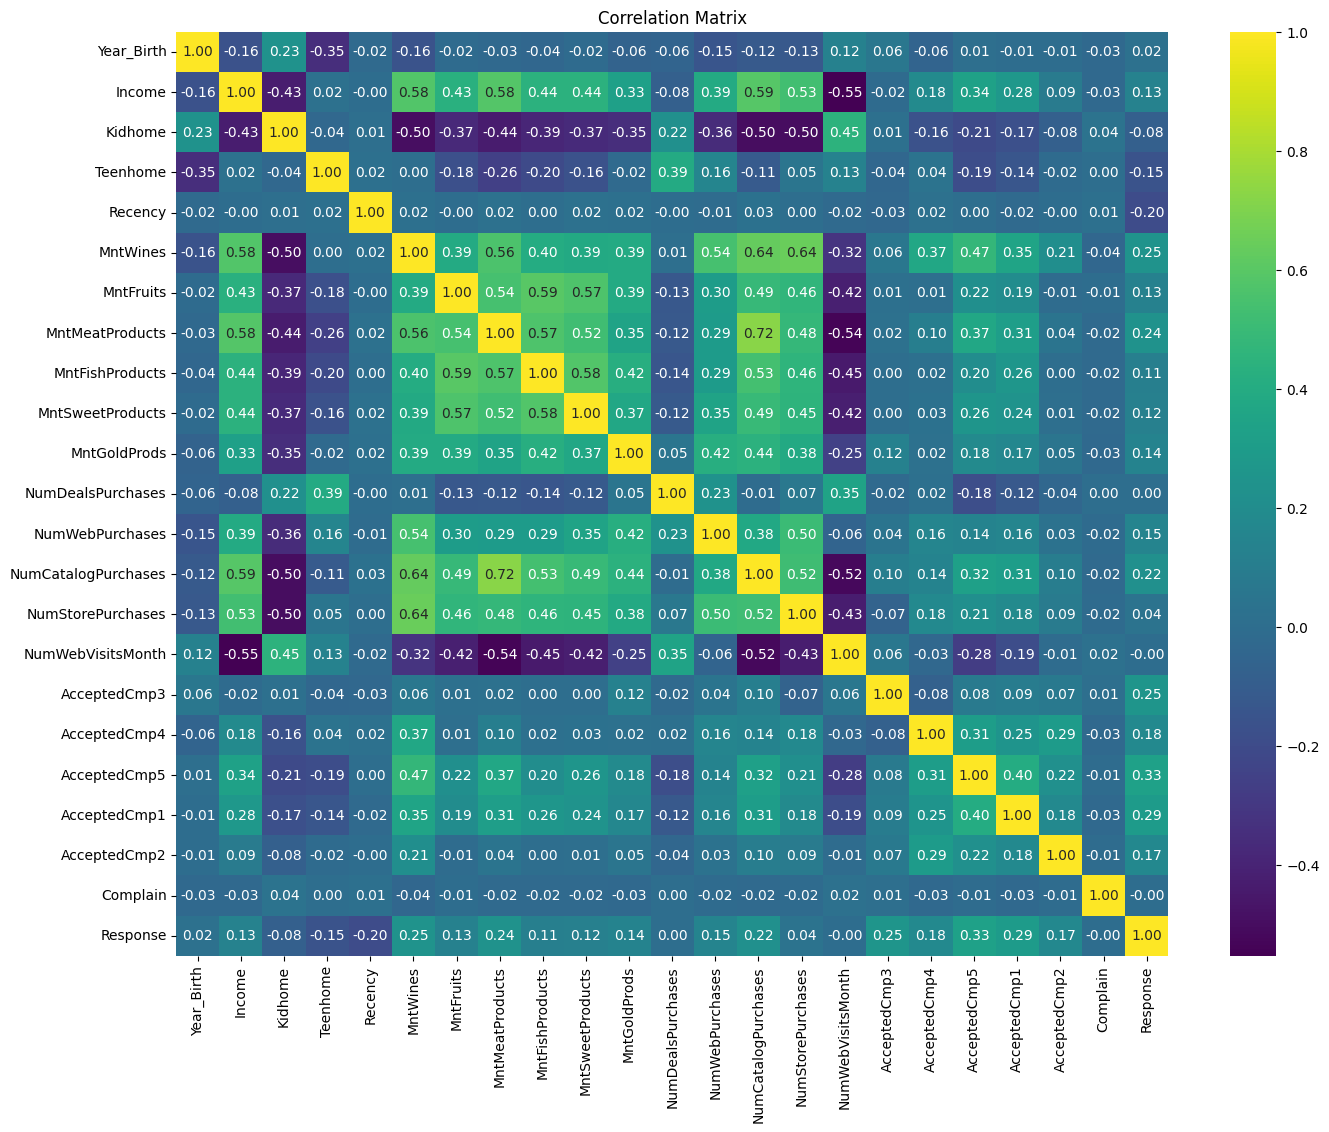

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = numerical_data.corr()

# Visualisasi
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Correlation Matrix")
plt.show()

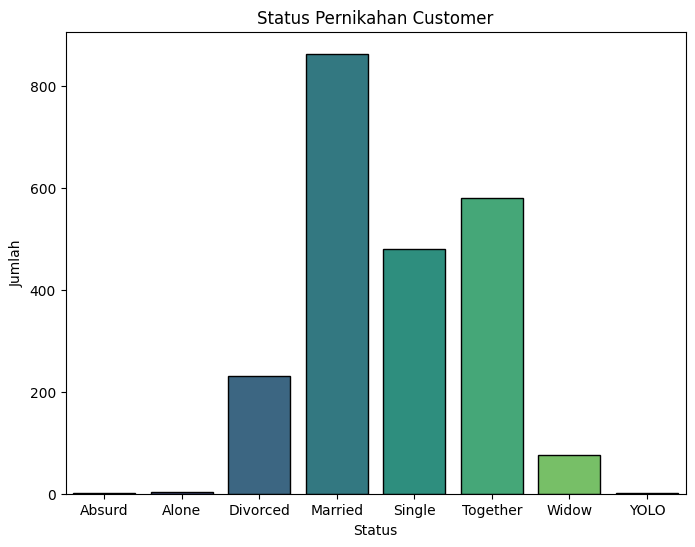

In [ ]:
# Status Pernikahan Customer
marital = data['Marital_Status'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=marital.index, y=marital.values, edgecolor='black', hue =marital.index, palette='viridis')
plt.title('Status Pernikahan Customer')
plt.xticks(rotation=0)
plt.ylabel('Jumlah')
plt.xlabel('Status')

plt.show()

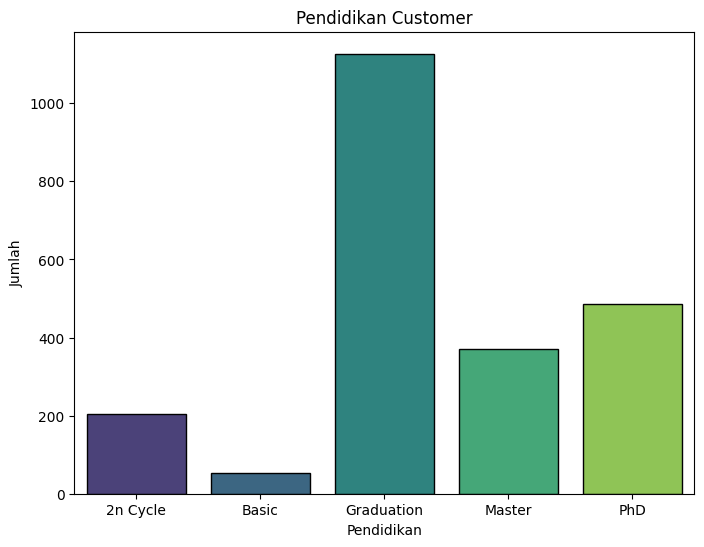

In [ ]:
# Pendidikan Customer
education = data['Education'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=education.index, y=education.values, edgecolor='black', hue =education.index, palette='viridis')
plt.title('Pendidikan Customer')
plt.xticks(rotation=0)
plt.ylabel('Jumlah')
plt.xlabel('Pendidikan')

plt.show()

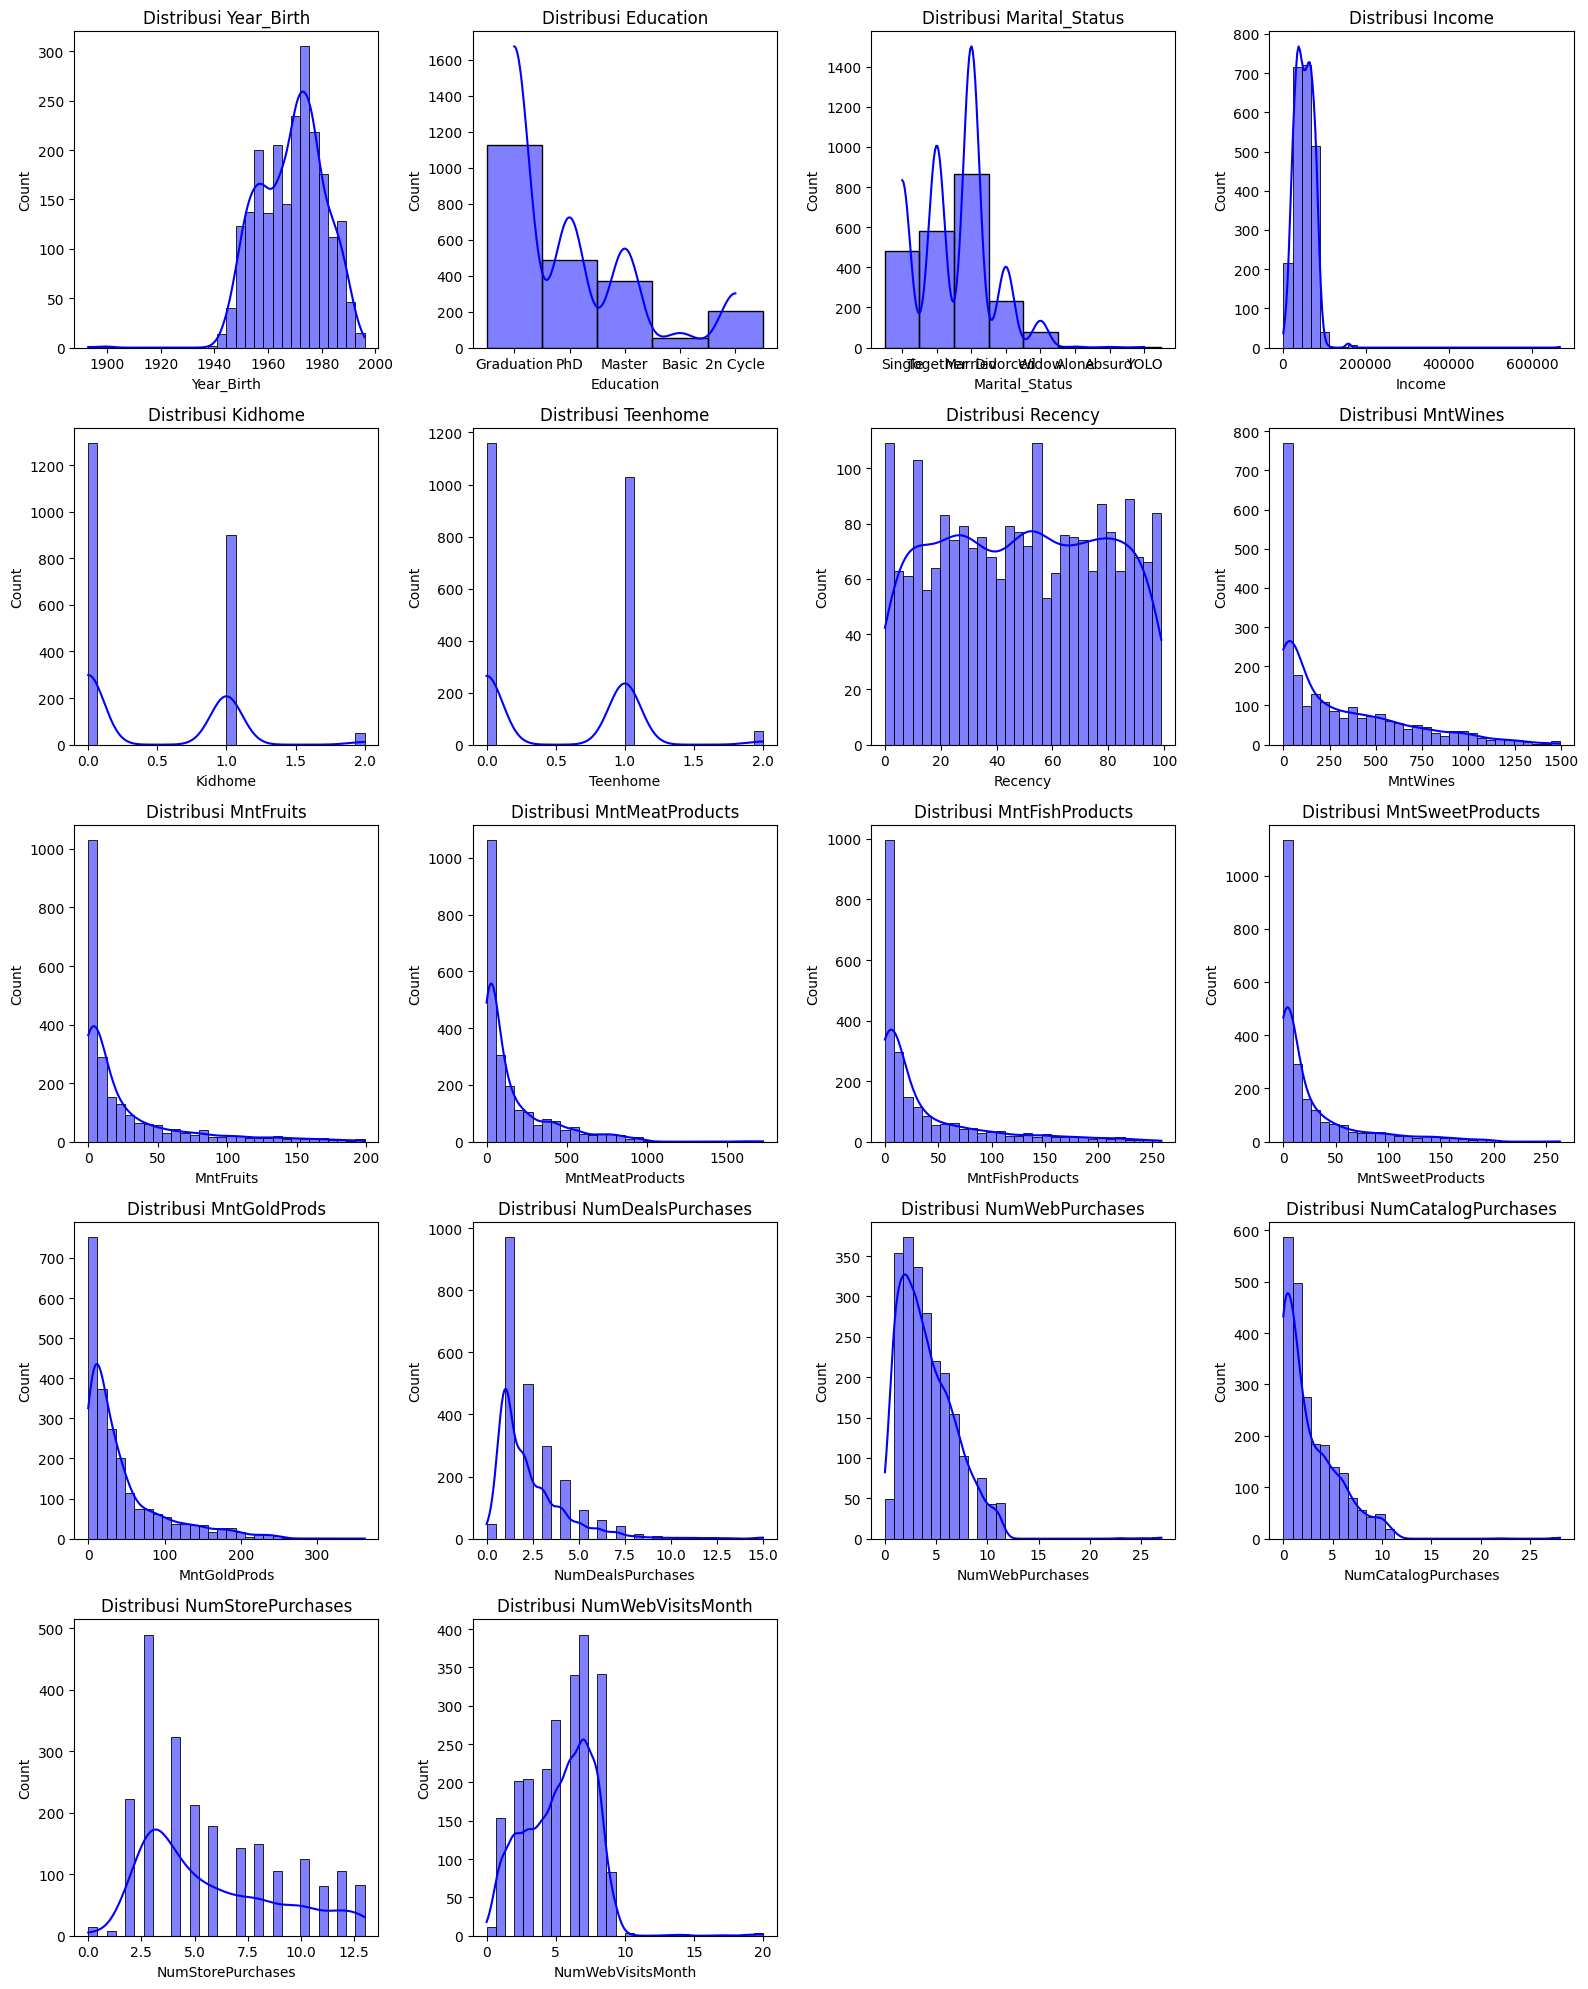

In [ ]:
# Distribusi fitur numerik
num_features = ['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Recency','MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases',
             'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
num_cols = len(num_features)

num_rows = int(np.ceil(num_cols / 4))

plt.figure(figsize=(16, 4 * num_rows))

for i, column in enumerate(num_features, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

In [ ]:
# Imputasi pada fitur yang mengandung missing value
imputer = SimpleImputer(strategy='median')
data[['Income']] = imputer.fit_transform(data[['Income']])

data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
# Menghapus data duplikat
data.drop_duplicates(inplace=True)
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
# Cek missing values dan data duplikat
print("\nMissing values per fitur:")
print(data.isnull().sum())
print("\nData duplikat:")
print(data.duplicated().sum())


Missing values per fitur:
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

Data duplikat:
0


In [ ]:
# Menambah Fitur Baru
data['Purchases'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [ ]:
# Menghitung lamanya customer terdaftar
# Ubah kolom 'dt_customers' menjadi datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],  format='%d-%m-%Y')

# Tentukan tanggal 31 Desember 2024
end_date = pd.to_datetime('31-12-2024', format='%d-%m-%Y')

# Hitung selisih hari
data['days_since_registration'] = (end_date - data['Dt_Customer']).dt.days

new_order = ['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','days_since_registration','Recency','MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases',
             'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
             'AcceptedCmp5','Complain','Response', 'Purchases']

data = data[new_order]

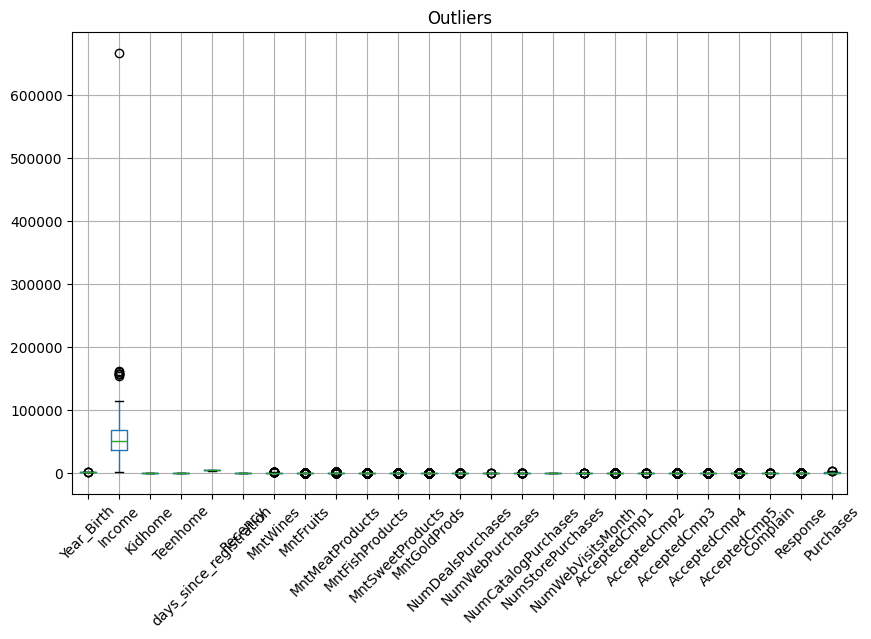

In [ ]:
# Deteksi outlier menggunakan IQR untuk semua kolom numerik
for column in data.select_dtypes(include='number').columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menemukan outlier
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Visualisasi dengan boxplot
data.select_dtypes(include='number').boxplot(figsize=(10, 6))
plt.title('Outliers')
plt.xticks(rotation=45)
plt.show()

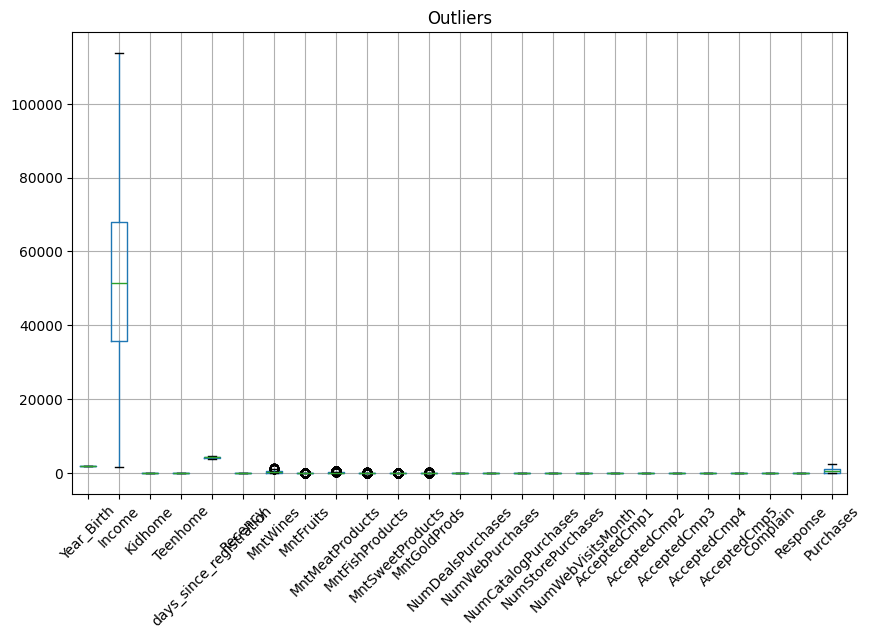

In [ ]:
# Menggunakan median untuk mengganti outlier
for column in data.select_dtypes(include='number').columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti outlier dengan median
    median_value = data[column].median()
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound),
                            median_value, data[column])
# Visualisasi dengan boxplot
data.select_dtypes(include='number').boxplot(figsize=(10, 6))
plt.title('Outliers')
plt.xticks(rotation=45)
plt.show()


In [ ]:
encoder = LabelEncoder()

data['Education'] = encoder.fit_transform(data['Education'])
data['Marital_Status'] = encoder.fit_transform(data['Marital_Status'])

In [ ]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,days_since_registration,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Purchases
0,1957.0,2,4,58138.0,0.0,0.0,4501.0,58.0,635.0,8.0,...,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1617.0
1,1954.0,2,4,46344.0,1.0,1.0,3951.0,38.0,11.0,1.0,...,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
2,1965.0,2,5,71613.0,0.0,0.0,4150.0,26.0,426.0,49.0,...,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,776.0
3,1984.0,2,5,26646.0,1.0,0.0,3977.0,26.0,11.0,4.0,...,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,1981.0,4,3,58293.0,1.0,0.0,3999.0,94.0,173.0,43.0,...,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,422.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [ ]:
# K-Means clustering
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(data)

## **b. Evaluasi Model Clustering**

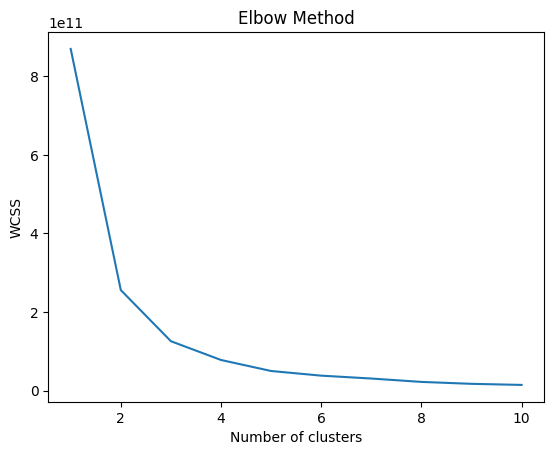

In [ ]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=3000, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Calculate the Silhouette Score
numerical_data = data.select_dtypes(include=['number'])
silhouette_avg = silhouette_score(numerical_data, kmeans_labels)

print(f"Silhouette Score for k={k}: {silhouette_avg}")

Silhouette Score for k=3: 0.5537439657926995


## **c. Visualisasi Hasil Clustering**

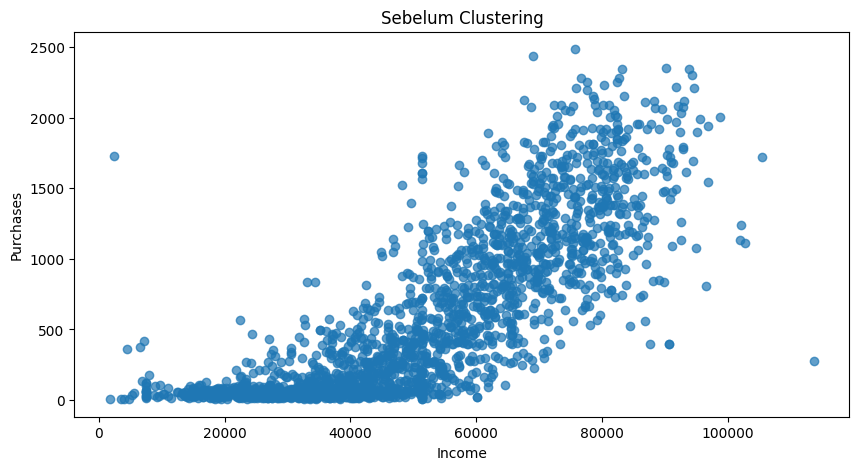

In [ ]:
# Visualisasi Sebelum Clustering
plt.figure(figsize=(10, 5))

plt.scatter(data['Income'], data['Purchases'], alpha=0.7)
plt.title('Sebelum Clustering')
plt.xlabel('Income')
plt.ylabel('Purchases')
plt.show()

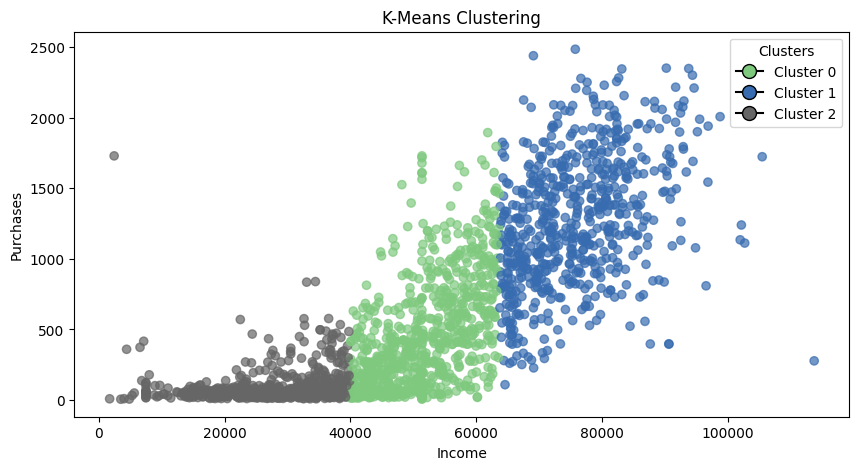

In [ ]:
# Visualisi Hasil
plt.figure(figsize=(10, 5))

# Membangun scatter plot
scatter = plt.scatter(data['Income'], data['Purchases'], c=kmeans_labels, cmap='Accent', alpha=0.7)

legend_elements = [plt.Line2D([0], [0], marker='o', color='black', label=f'Cluster {i}',
                           markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
                   for i in range(3)]
plt.legend(handles=legend_elements, title='Clusters')

plt.title('K-Means Clustering')
plt.xlabel('Income')
plt.ylabel('Purchases')

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [ ]:
data['Cluster'] = kmeans_labels


In [ ]:
# Menghitung rata-rata income untuk setiap cluster
rata_rata_income = data.groupby('Cluster')['Income'].mean()

print(rata_rata_income)

Cluster
0    51730.449198
1    75688.286595
2    28065.122542
Name: Income, dtype: float64


In [ ]:
# Menghitung rata-rata pembelian untuk setiap cluster
rata_rata_purchases = data.groupby('Cluster')['Purchases'].mean()

print(rata_rata_purchases)

Cluster
0     473.235294
1    1270.936055
2      94.464448
Name: Purchases, dtype: float64


In [ ]:
# Menghitung jumlah status pernikahan untuk setiap cluster
jumlah_status = data.groupby('Cluster')['Marital_Status'].value_counts()

print(jumlah_status)
for i, label in enumerate(encoder.classes_):
    print(f"{label} : {i}")


Cluster  Marital_Status
0        3                 285
         5                 190
         4                 153
         2                  85
         6                  32
         7                   2
         1                   1
1        3                 249
         5                 164
         4                 135
         2                  71
         6                  28
         0                   2
2        3                 261
         5                 167
         4                 160
         2                  60
         6                  11
         1                   2
Name: count, dtype: int64
Absurd : 0
Alone : 1
Divorced : 2
Married : 3
Single : 4
Together : 5
Widow : 6
YOLO : 7


---

1. **Cluster 2** (Income Rendah, Purchases Rendah):
  
  Distribusi menunjukkan bahwa pelanggan dalam kelompok ini memiliki daya beli terbatas. Pola ini logis karena pendapatan rendah biasanya membatasi kemampuan untuk membeli barang dalam jumlah besar.

2. **Cluster 0** (Income Menengah, Purchases Menengah):
  
  Distribusi menengah di kedua dimensi (income dan purchases) mungkin mencerminkan kelompok dengan pengeluaran seimbang sesuai pendapatannya. Mereka cenderung berhati-hati dalam pengeluaran tetapi memiliki cukup kapasitas untuk membeli barang sesuai kebutuhan.

3. **Cluster 1** (Income Tinggi, Purchases Tinggi):

  Pola ini logis karena pelanggan berpenghasilan tinggi cenderung memiliki daya beli lebih besar, sehingga pembelian mereka lebih banyak. Ada kemungkinan bahwa preferensi dan kebutuhan mereka lebih beragam.

# **7. Mengeksport Data**


In [ ]:
data.to_csv('/content/customer_clustered.csv', index=False)